In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To display all columns:
pd.set_option('display.max_columns', None)  # None means no limit

df = pd.read_csv("mymoviedb.csv", engine="python")
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.shape

(9837, 9)

## <span style="color:green"><b>Checking for null values</b></span>

In [4]:
# Checking for null values in columns

df.isnull().sum()

Release_Date          0
Title                 9
Overview              9
Popularity           10
Vote_Count           10
Vote_Average         10
Original_Language    10
Genre                11
Poster_Url           11
dtype: int64

In [5]:
df[df.loc[:,"Poster_Url"].isnull()]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
1105,2013-10-20,Pixie Hollow Bake Off,Tink challenges Gelata to see who can bake the...,NaN,None,None,None,None,None
1106,- Just Desserts,None,None,NaN,None,None,None,None,None
1107,- If The Hue Fits,None,None,NaN,None,None,None,None,None
1108,- Dust Up,None,None,NaN,None,None,None,None,None
1109,- Scents And Sensibility,None,None,NaN,None,None,None,None,None
1110,- Just One Of The Girls,None,None,NaN,None,None,None,None,None
1111,- Volleybug,None,None,NaN,None,None,None,None,None
1112,- Hide And Tink,None,None,NaN,None,None,None,None,None
1113,- Rainbow's Ends,None,None,NaN,None,None,None,None,None
1114,- Fawn And Games,None,None,NaN,None,None,None,None,None


#### You can observe that these 11 records contain null values so drop these records

In [6]:
df.shape

(9837, 9)

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(9826, 9)

### <span style="color:green"><b> Check for duplicated rows</b></span>

In [9]:
df.duplicated().sum()

0

### <span style="color:green"><b> Check for valid data type or data</b></span>

In [10]:
# code to check no of unique values in a column and list them
num_list = [] # Generate a empty list to store feature index no in future
num = 0

cols_desc = [] # an empty list
for col in df.columns: # Iterate over cols
    num += 1
    num_list.append(num)
    cols_desc.append([col, df[col].dtypes,df[col].isna().sum(),np.round(df.loc[:,col].isnull().sum() /  len(df), 10) * 100,df[col].nunique(),
     df[col].unique()])

desc = pd.DataFrame(data=cols_desc,index=num_list,columns=['Data_Features','dtype','Null','Null_%','no_of_uni_val','Uni_val_list'])

desc

,Data_Features,dtype,Null,Null_%,no_of_uni_val,Uni_val_list
1,Release_Date,object,0,0.0,5892,"[2021-12-15, 2022-03-01, 2022-02-25, 2021-11-2..."
2,Title,object,0,0.0,9512,"[Spider-Man: No Way Home, The Batman, No Exit,..."
3,Overview,object,0,0.0,9821,[Peter Parker is unmasked and no longer able t...
4,Popularity,float64,0,0.0,8159,"[5083.954, 3827.658, 2618.087, 2402.201, 1895...."
5,Vote_Count,object,0,0.0,3266,"[8940, 1151, 122, 5076, 1793, 33, 821, 206, 11..."
6,Vote_Average,object,0,0.0,74,"[8.3, 8.1, 6.3, 7.7, 7.0, 6.6, 6.8, 5.3, 7.2, ..."
7,Original_Language,object,0,0.0,43,"[en, ja, fr, hi, es, ru, de, th, ko, tr, cn, z..."
8,Genre,object,0,0.0,2337,"[Action, Adventure, Science Fiction, Crime, My..."
9,Poster_Url,object,0,0.0,9826,[https://image.tmdb.org/t/p/original/1g0dhYtq4...


### NOTE:
- Release_Date col is Object data type has to be changed to datetime data type
- From Release_Date col we have to generate 3 cols one each for day, month and year

- Vote_Count col must be converted to int from object data type
- Vote_Avergaet col must be converted to float from object data type
- Poster_Url is such unncessary col drop it
- Original_Language is such unncessary col drop it
- Overview is such unncessary col drop it

### <span style="color:green"><b> Converting columns from one data type to another</b></span>

In [11]:
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [12]:
# Convert to datetime format
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [13]:
# Convert to int format
df['Vote_Count'] = df['Vote_Count'].astype("int")

# Convert to float format
df['Vote_Average'] = df['Vote_Average'].astype("float")

In [14]:
df.dtypes

Release_Date         datetime64[ns]
Title                        object
Overview                     object
Popularity                  float64
Vote_Count                    int32
Vote_Average                float64
Original_Language            object
Genre                        object
Poster_Url                   object
dtype: object

### <span style="color:green"><b>Dropping columns</b></span>

In [15]:
df.shape

(9826, 9)

In [16]:
# making list of column to be dropped
drop_cols = ['Overview', 'Original_Language', 'Poster_Url']

In [17]:
df.drop(drop_cols,axis=1,inplace=True)

In [18]:
df.shape

(9826, 6)

### <span style="color:green"><b> Creating new columns from already existing</b></span>

In [19]:
# Extract Day, Month, and Year
df['Day'] = df['Release_Date'].dt.day
df['Month'] = df['Release_Date'].dt.month
df['Year'] = df['Release_Date'].dt.year

In [20]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre', 'Day', 'Month', 'Year'],
      dtype='object')

### Convert the Genre String into a List

- <b> Movie A has Genre of	"Drama, Horror, Thriller, Science Fiction"
- The str.split(', ') function splits the genres at the comma (, ) and converts them into a list.
- Movie A	['Drama', 'Horror', 'Thriller', 'Science Fiction']

In [21]:
df['Genre'] = df['Genre'].str.split(', ')

### Explode the List into Separate Rows

- Movie A:	Drama
- Movie A:	Horror
- Movie A:	Thriller
- Movie A:	Science Fiction

In [22]:
df = df.explode('Genre').reset_index(drop=True)

In [23]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Day,Month,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Action,15,12,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,15,12,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,15,12,2021
3,2022-03-01,The Batman,3827.658,1151,8.1,Crime,1,3,2022
4,2022-03-01,The Batman,3827.658,1151,8.1,Mystery,1,3,2022


In [24]:
df.loc[:,"Genre"].dtype

dtype('O')

In [25]:
# casting column into category
df['Genre'] = df['Genre'].astype('category')
# confirming changes
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [26]:
df.shape

(25792, 9)

### <span style="color:red"><b> Q1: What is the most frequent genre in the dataset?</b></span>

In [27]:
df.loc[:, "Genre"].nunique()

19

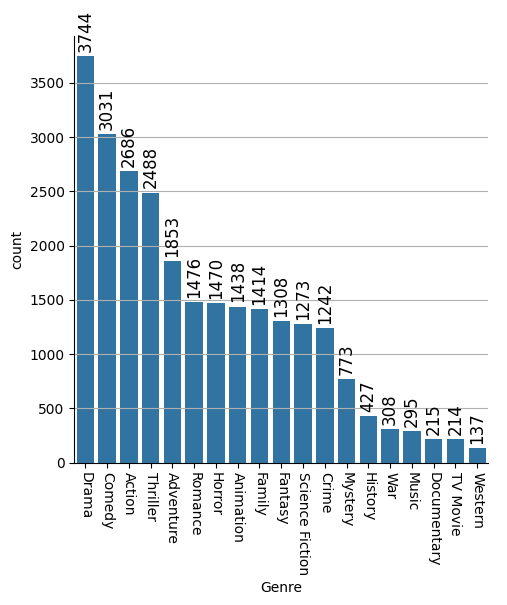

In [28]:
g = sns.catplot(x= "Genre",kind="count",data=df,order=df['Genre'].value_counts().index)
plt.grid(axis="y")
plt.xticks(rotation=270)

# Add labels on top of bars
ax = g.ax  # Get the axes from the FacetGrid
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=12, color='black', padding=3, rotation=90)
    
plt.show()

- we can notice from the above visual that Drama genre is the most frequent genre
in our dataset and has appeared more than 14% of the times among 19 other
genres

### <span style="color:red"><b> Q2: What genres has highest votes ?</b></span>

In [29]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre', 'Day', 'Month', 'Year'],
      dtype='object')

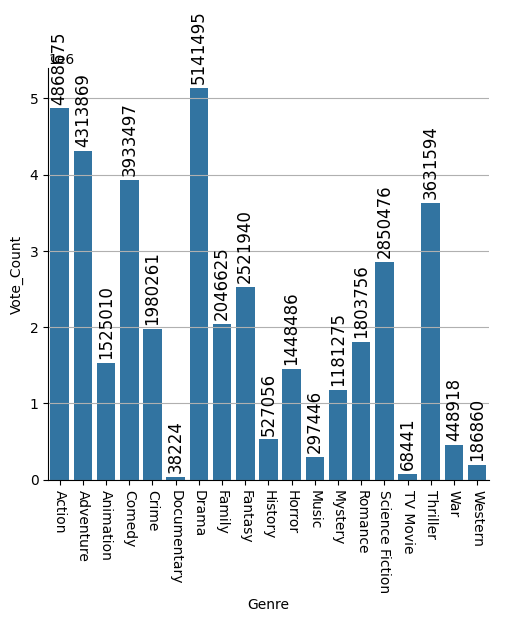

In [30]:
g = sns.catplot(x= "Genre",y="Vote_Count",kind="bar",data=df,errorbar=None,estimator=np.sum)
plt.grid(axis="y")
plt.xticks(rotation=270)

# Add labels on top of bars
ax = g.ax  # Get the axes from the FacetGrid
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=12, color='black', padding=3, rotation=90)
    
plt.show()

- Drama Genre has the most vote count

### <span style="color:red"><b> Q3: What movie got the highest popularity ? what's its genre ?</b></span>

In [31]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre', 'Day', 'Month', 'Year'],
      dtype='object')

In [34]:
df.loc[:,"Popularity"].dtype

dtype('float64')

In [33]:
df.loc[:,"Popularity"].max()

5083.954

In [38]:
df[df.loc[:,"Popularity"] == df.loc[:,"Popularity"].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Day,Month,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Action,15,12,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,15,12,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,15,12,2021


In [40]:
df[df.loc[:,"Popularity"] == df.loc[:,"Popularity"].max()][["Title","Genre"]]

,Title,Genre
0,Spider-Man: No Way Home,Action
1,Spider-Man: No Way Home,Adventure
2,Spider-Man: No Way Home,Science Fiction


- Spider-Man: No Way Home has the highest popularity rate in our dataset and it has
genres of Action , Adventure and Sience Fiction .

### <span style="color:red"><b> Q4: What movie got the lowest popularity? what's its genre?</b></span>

In [42]:
df.loc[:,"Popularity"].min()

13.354

In [44]:
df[df.loc[:,"Popularity"] == df.loc[:,"Popularity"].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Day,Month,Year
25786,2021-03-31,The United States vs. Billie Holiday,13.354,152,6.7,Music,31,3,2021
25787,2021-03-31,The United States vs. Billie Holiday,13.354,152,6.7,Drama,31,3,2021
25788,2021-03-31,The United States vs. Billie Holiday,13.354,152,6.7,History,31,3,2021
25789,1984-09-23,Threads,13.354,186,7.8,War,23,9,1984
25790,1984-09-23,Threads,13.354,186,7.8,Drama,23,9,1984
25791,1984-09-23,Threads,13.354,186,7.8,Science Fiction,23,9,1984


In [41]:
df[df.loc[:,"Popularity"] == df.loc[:,"Popularity"].min()][["Title","Genre"]]

,Title,Genre
25786,The United States vs. Billie Holiday,Music
25787,The United States vs. Billie Holiday,Drama
25788,The United States vs. Billie Holiday,History
25789,Threads,War
25790,Threads,Drama
25791,Threads,Science Fiction


- The United States vs. Billie Holiday and threads these 2 movies have lowest popularity
- Movie "The United States" has Genre of Music, Drama and History
- Movie "The United States" has Genre of War, Drama and Science Fiction

### <span style="color:red"><b> Q5: Which year has the most filmmed movies?</b></span>

In [45]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre', 'Day', 'Month', 'Year'],
      dtype='object')

In [53]:
np.round(df.loc[:,"Year"].value_counts() / df.loc[:,"Year"].value_counts().sum(),5) * 100

Year
2021    6.351
2018    5.378
2017    5.292
2019    4.932
2016    4.699
        ...  
2024    0.016
1902    0.012
1925    0.008
1929    0.008
1930    0.008
Name: count, Length: 102, dtype: float64

- In year 2021 6.35% of movies out of total were released highest ever in a year

### <span style="color:red"><b> Conclusion:</b></span>

<b> Q1: What is the most frequent genre in the dataset?
- Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres. 
<br> <br> <b> Q2: What genres has highest votes ?
- we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the
highest popularity among fans by being having more than 18.5% of movies popularities.
<br> <br> <b> Q3: What movie got the highest popularity ? what's its genre ?
- Spider-Man: No Way Home has the highest popularity rate in our dataset and it has
genres of Action , Adventure and Sience Fiction .
<br> <br><b> Q4: What movie got the lowest popularity ? what's its genre ?
- The united states, thread' has the highest lowest rate in our dataset
and it has genres of music , drama , 'war', 'sci-fi' and history`.
<br> <br><b> Q5: Which year has the most filmmed movies?
- year 2020 has the highest filmming rate in our dataset

### <span style="color:green"><b> END:</b></span>